## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
master_data_df=pd.DataFrame(master_data)
master_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_list=master_data_df["Mouse ID"].unique()
mouse_count=len(mouse_list)
mouse_count

249

In [5]:
#determine how many timepoints there should be for each record
timepointcount=master_data_df.nunique()["Timepoint"]
timepointcount

10

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#group the data by mouse ID and identify any ID with too many timepoints 
mouse_group=master_data_df.groupby("Mouse ID").count()
mouse_group=mouse_group.sort_values("Timepoint", ascending=False)
mouse_group





,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,13,13,13,13,13,13,13
a203,10,10,10,10,10,10,10
n364,10,10,10,10,10,10,10
m546,10,10,10,10,10,10,10
m550,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...
x226,1,1,1,1,1,1,1
b447,1,1,1,1,1,1,1
f932,1,1,1,1,1,1,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

#duplicate_mouse = master_data_df["Mouse ID"== "g989"]
#duplicate_mouse.head()


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = master_data_df.loc[master_data_df["Mouse ID"] != "g989"]
clean_mice_df=pd.DataFrame(clean_mice)
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [251]:
# Checking the number of mice in the clean DataFrame.
clean_mice_list = clean_mice_df["Mouse ID"].unique()
clean_mice_list
clean_mice_count=len(clean_mice_list)
clean_mice_count

248

In [49]:
clean_mice_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [50]:
organized_mice_df=clean_mice_df[['Drug Regimen', 'Mouse ID', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
organized_mice_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Ramicane,k403,Male,21,16,0,45.000000,0
1,Ramicane,k403,Male,21,16,5,38.825898,0
2,Ramicane,k403,Male,21,16,10,35.014271,1
3,Ramicane,k403,Male,21,16,15,34.223992,1
4,Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,Naftisol,z969,Male,9,30,25,63.145652,2
1889,Naftisol,z969,Male,9,30,30,65.841013,3
1890,Naftisol,z969,Male,9,30,35,69.176246,4
1891,Naftisol,z969,Male,9,30,40,70.314904,4


In [58]:
drugs = organized_mice_df["Drug Regimen"].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean=organized_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=organized_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var=organized_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std=organized_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


drug_tumorvol_summary=pd.DataFrame({"Tumor Volume Mean": mean, "Tumor Volume Median": median,
                                  "Variance": var, "Tumor STD": std})
drug_tumorvol_summary

,Tumor Volume Mean,Tumor Volume Median,Variance,Tumor STD
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation=clean_mice_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'count'])["Tumor Volume (mm3)"]
summary_aggregation

,mean,median,var,std,count
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,178
Infubinol,52.884795,51.820584,43.128684,6.567243,178
Ketapril,55.235638,53.698743,68.553577,8.279709,188
Naftisol,54.331565,52.509285,66.173479,8.134708,186
Placebo,54.033581,52.288934,61.168083,7.821003,181
Propriva,52.320930,50.446266,43.852013,6.622085,148
Ramicane,40.216745,40.673236,23.486704,4.846308,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,181


In [106]:
drug_group=pd.DataFrame(summary_aggregation)
new_drug_group=drug_group.reset_index()
new_drug_group

,Drug Regimen,mean,median,var,std,count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,181
6,Propriva,52.320930,50.446266,43.852013,6.622085,148
7,Ramicane,40.216745,40.673236,23.486704,4.846308,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,182


In [110]:
new_drug_group.columns

Index(['Drug Regimen', 'mean', 'median', 'var', 'std', 'count'], dtype='object')

## Bar and Pie Charts

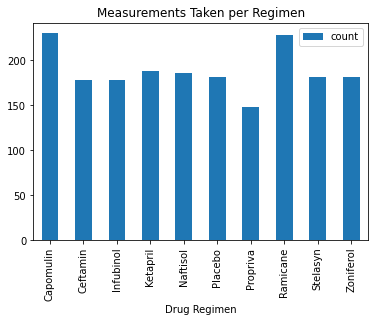

In [120]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count=new_drug_group.loc[:,['Drug Regimen','count']]
measure_chart=measure_count.plot(kind="bar", x="Drug Regimen", title="Measurements Taken per Regimen")

10

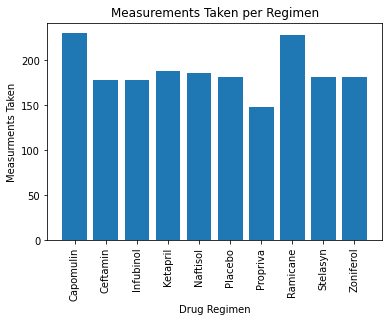

In [124]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
#plt.figure(figsize=(20,3))
plt.bar(x_axis, new_drug_group["count"])
plt.xticks(tick_locations, new_drug_group["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurments Taken")
plt.title("Measurements Taken per Regimen")
plt.show()
 #color='r', alpha=0.5, align="center

In [216]:
gender_data=organized_mice_df.groupby('Sex').nunique()["Mouse ID"]
gender_df=pd.DataFrame(gender_data)
gender_df=gender_df.rename(columns={"Mouse ID": "Number of Mice"})
gender_data=gender_df.reset_index()
gender_data

,Sex,Number of Mice
0,Female,123
1,Male,125


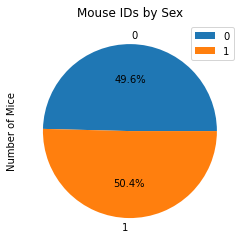

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie=gender_data.plot(kind="pie", y="Number of Mice", title="Mouse IDs by Sex", autopct="%1.1f%%")



Text(0.5, 1.0, 'Mouse IDs by Gender')

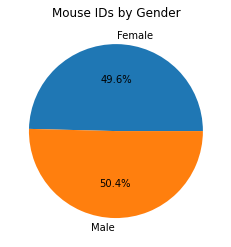

In [234]:
# Generate a pie plot showing the distribution of female versus male labmice using pyplot
labels=gender_data['Sex'].unique()
labels
plt.pie(gender_data["Number of Mice"], labels=labels,autopct="%1.1f%%")
plt.title("Mouse IDs by Gender")




In [263]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
final_time=organized_mice_df.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"].value()["Tumor Volume (mm3)"]
final_time


# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse



final_tumor=pd.DataFrame({"Final Tumor Volume":final_time})
new_index_final_tumor=final_tumor.reset_index()
new_index_final_tumor



AttributeError: 'Series' object has no attribute 'value'

In [261]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
updated_df=pd.merge(organized_mice_df,new_index_final_tumor, on="Mouse ID")
updated_df

,Drug Regimen_x,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y,Final Tumor Volume
0,Ramicane,k403,Male,21,16,0,45.000000,0,Ramicane,45.000000
1,Ramicane,k403,Male,21,16,5,38.825898,0,Ramicane,45.000000
2,Ramicane,k403,Male,21,16,10,35.014271,1,Ramicane,45.000000
3,Ramicane,k403,Male,21,16,15,34.223992,1,Ramicane,45.000000
4,Ramicane,k403,Male,21,16,20,32.997729,1,Ramicane,45.000000
...,...,...,...,...,...,...,...,...,...,...
1875,Naftisol,z969,Male,9,30,25,63.145652,2,Naftisol,73.867845
1876,Naftisol,z969,Male,9,30,30,65.841013,3,Naftisol,73.867845
1877,Naftisol,z969,Male,9,30,35,69.176246,4,Naftisol,73.867845
1878,Naftisol,z969,Male,9,30,40,70.314904,4,Naftisol,73.867845


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
